In [1]:
## This notebook opens all four GB structures obtained from GRIP and measures the GB excess per unit GB area

In [2]:
import os
import numpy as np
import ase
from ase.visualize import view
from abtem.visualize import show_atoms
import hyperspy.api as hs
import scipy
import matplotlib.pyplot as plt

In [3]:
plt.rcParams['font.family'] = ['arial']

In [4]:
plt.rcParams['figure.figsize'] = [12, 8]

# GB - 01

In [5]:
folder = 'Data/GRIP/'

files = [i for i in os.listdir(folder) if i.startswith("G")]
cells = [os.path.join(folder, i) for i in files]
cells

['Data/GRIP/GB-Cage-04',
 'Data/GRIP/GB-Cage-01',
 'Data/GRIP/GB-Cage-02',
 'Data/GRIP/GB-Cage-03']

In [6]:
from ase.io import read

file_index = 0
atoms = read(cells[file_index])

## Display simulation cell with ASE

(<Figure size 2000x2000 with 2 Axes>, <Axes: xlabel='y [Å]', ylabel='z [Å]'>)

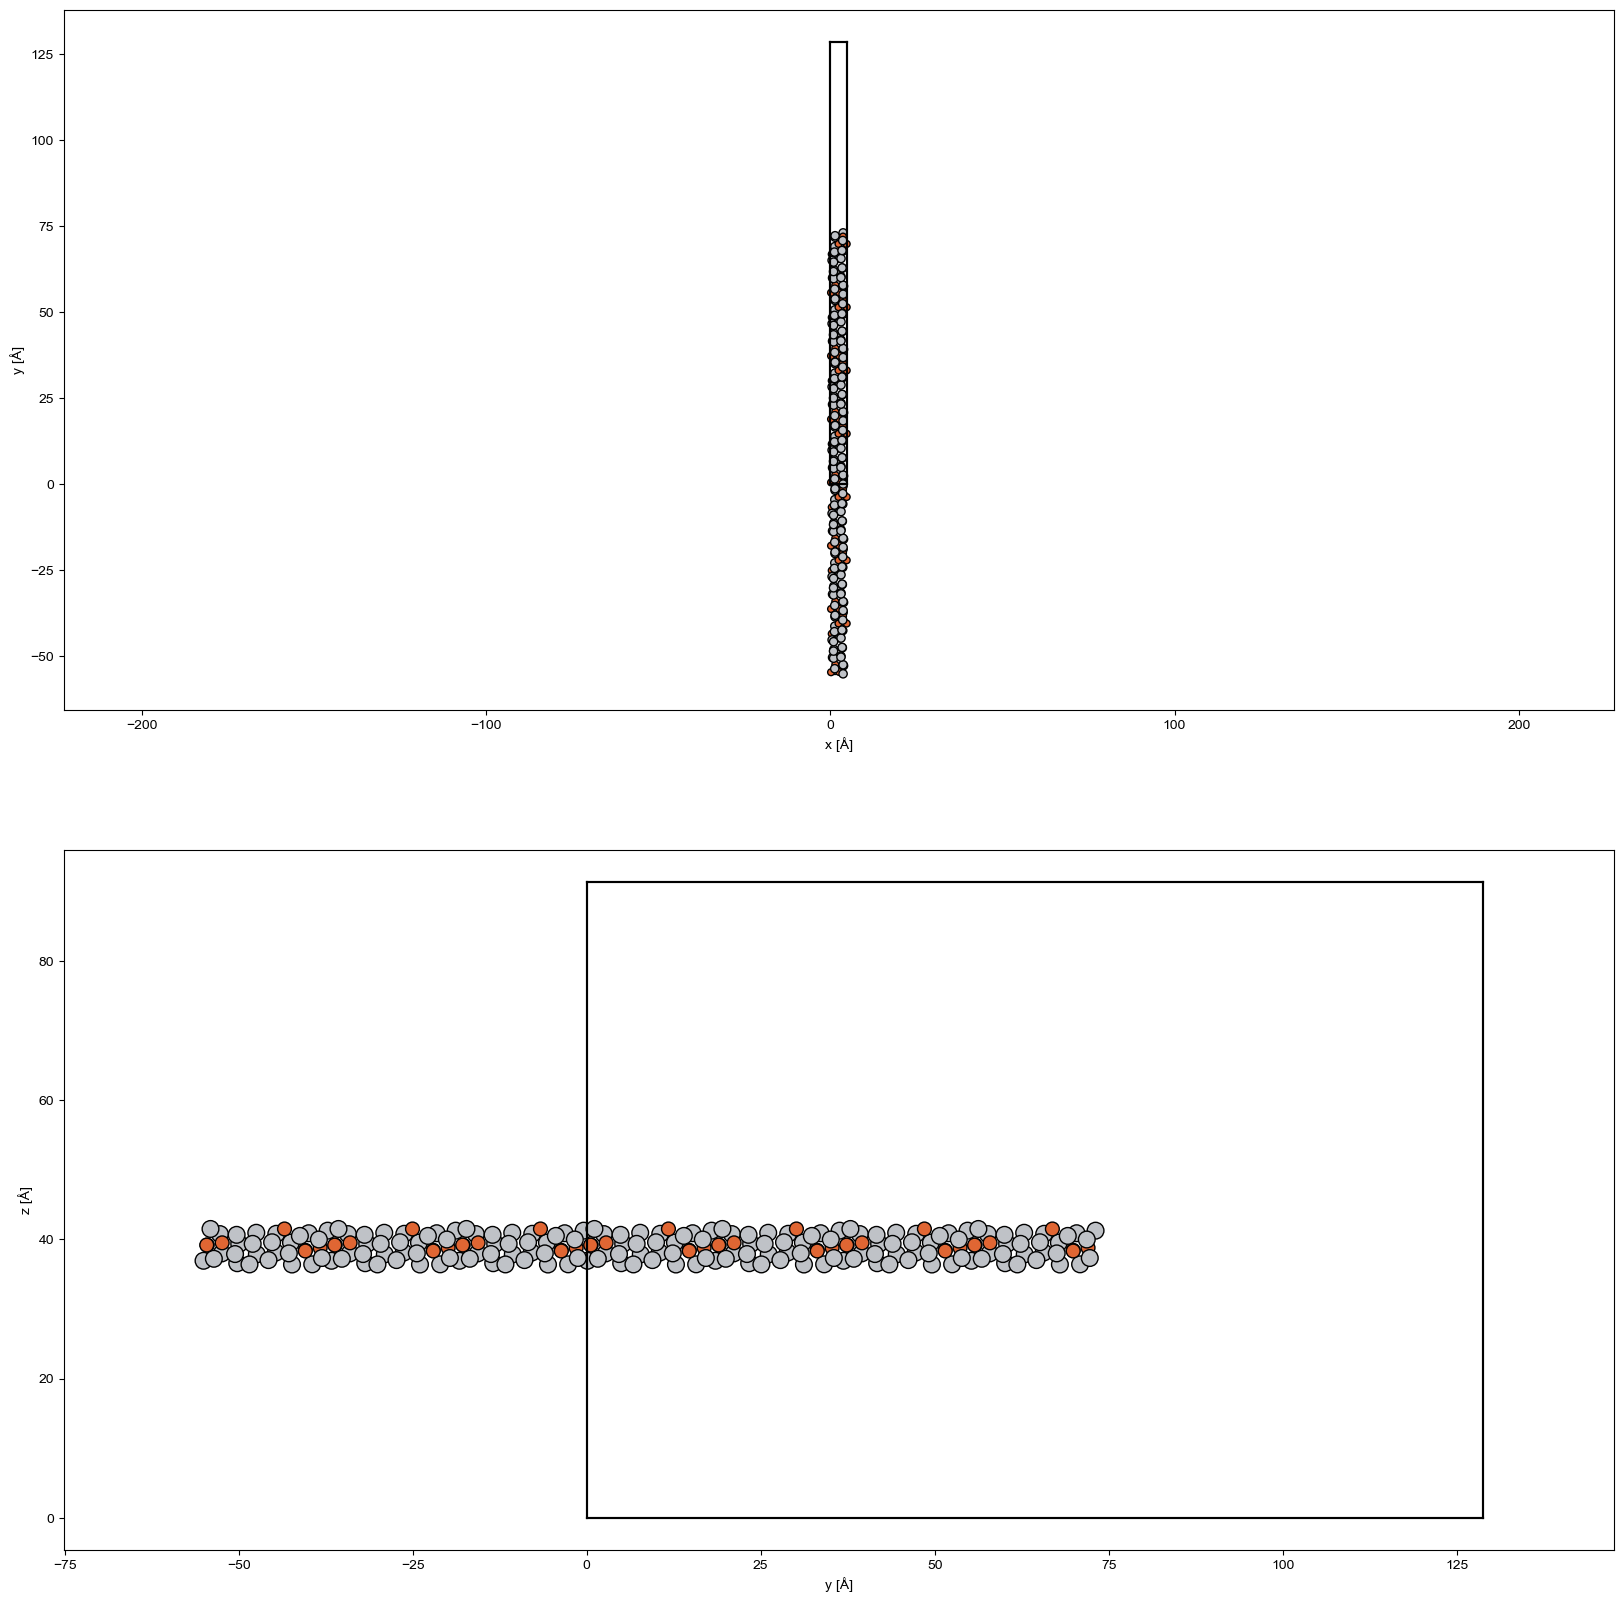

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 20))
show_atoms(atoms, plane='xy', ax=ax1)
show_atoms(atoms, plane='yz', ax=ax2)

In [8]:
# Determine atom coordinates along z-direction (beam direction)
atoms_pos = atoms.get_positions()

In [9]:
# Swap x and z axis
atoms_pos[:, 0], atoms_pos[:, 1] = atoms_pos[:, 1], atoms_pos[:, 0].copy()
atoms_pos[:, 1], atoms_pos[:, 2] = atoms_pos[:, 2], atoms_pos[:, 1].copy()

In [10]:
# Shift atom positions : every position minus the minimum shifts atoms from negative to the positive side
atoms_pos_new = atoms_pos
atoms_pos_new[:, 0] = atoms_pos_new[:, 0] - np.min(atoms_pos_new[:, 0])
atoms_pos_new[:, 1] = atoms_pos_new[:, 1] - np.min(atoms_pos_new[:, 1])
atoms_pos_new[:, 2] = atoms_pos_new[:, 2] - np.min(atoms_pos_new[:, 2])

# Set new atom positions
atoms.set_positions(atoms_pos_new)

# Set new cell
atoms_pos = atoms.get_positions()
atoms.set_cell([np.max(atoms_pos[:, 0]), np.max(atoms_pos[:, 1]), np.max(atoms_pos[:, 2])])

(<Figure size 2000x2000 with 2 Axes>, <Axes: xlabel='y [Å]', ylabel='z [Å]'>)

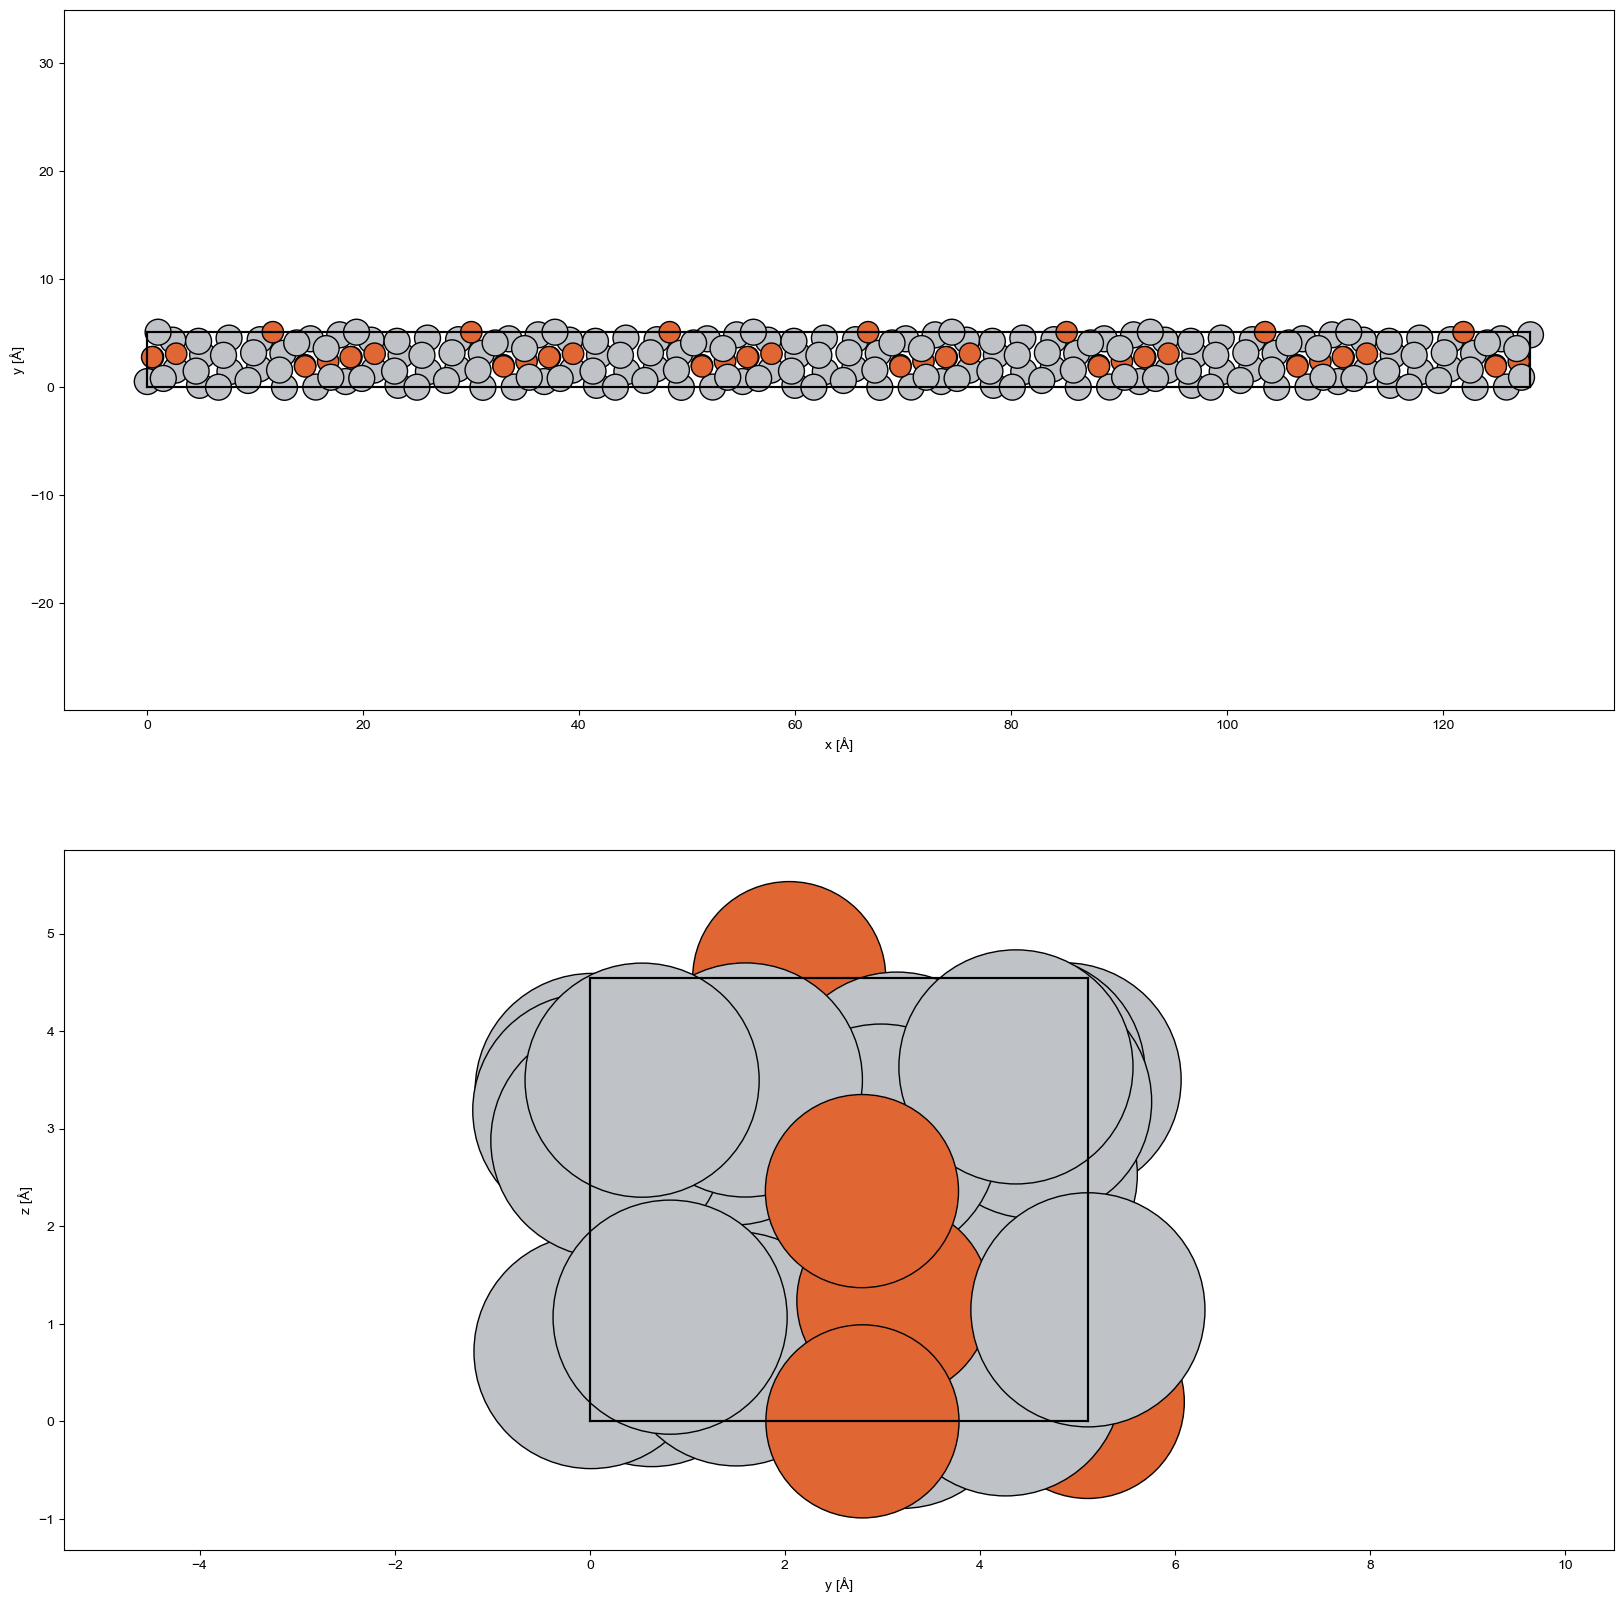

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 20))
show_atoms(atoms, plane='xy', ax=ax1)
show_atoms(atoms, plane='yz', ax=ax2)

In [12]:
# GB Area crosssection:
x = np.max(atoms_pos[:, 0]) # or atoms.cell[0][0]
y = np.max(atoms_pos[:, 1]) # or atoms.cell[1][1]
z = np.max(atoms_pos[:, 2]) # or atoms.cell[2][2]
GB_Area = x * z * 1e-2  # To convert the area to nm2
GB_Vol = x * y * z * 1e-3 # To convert the area to nm2
GB_Area

5.821805461047738

In [13]:
# Read the number of Fe atoms in the GB
#atoms.numbers is a list of atomic numbers of all the elements present in the 'atoms'
Fe_atoms = np.count_nonzero(atoms.numbers == 26)
Fe_atoms

49

In [14]:
GB_Excess = []
GB_Excess.append(Fe_atoms/GB_Area)

In [15]:
GB_Excess_vol = []
GB_Excess_vol.append(Fe_atoms/GB_Vol)

# GB-02

In [16]:
folder = 'Data/GRIP/'

files = [i for i in os.listdir(folder) if i.startswith("G")]
cells = [os.path.join(folder, i) for i in files]
cells

['Data/GRIP/GB-Cage-04',
 'Data/GRIP/GB-Cage-01',
 'Data/GRIP/GB-Cage-02',
 'Data/GRIP/GB-Cage-03']

In [17]:
from ase.io import read

file_index = 1
atoms = read(cells[file_index])

## Display simulation cell with ASE

(<Figure size 2000x2000 with 2 Axes>, <Axes: xlabel='y [Å]', ylabel='z [Å]'>)

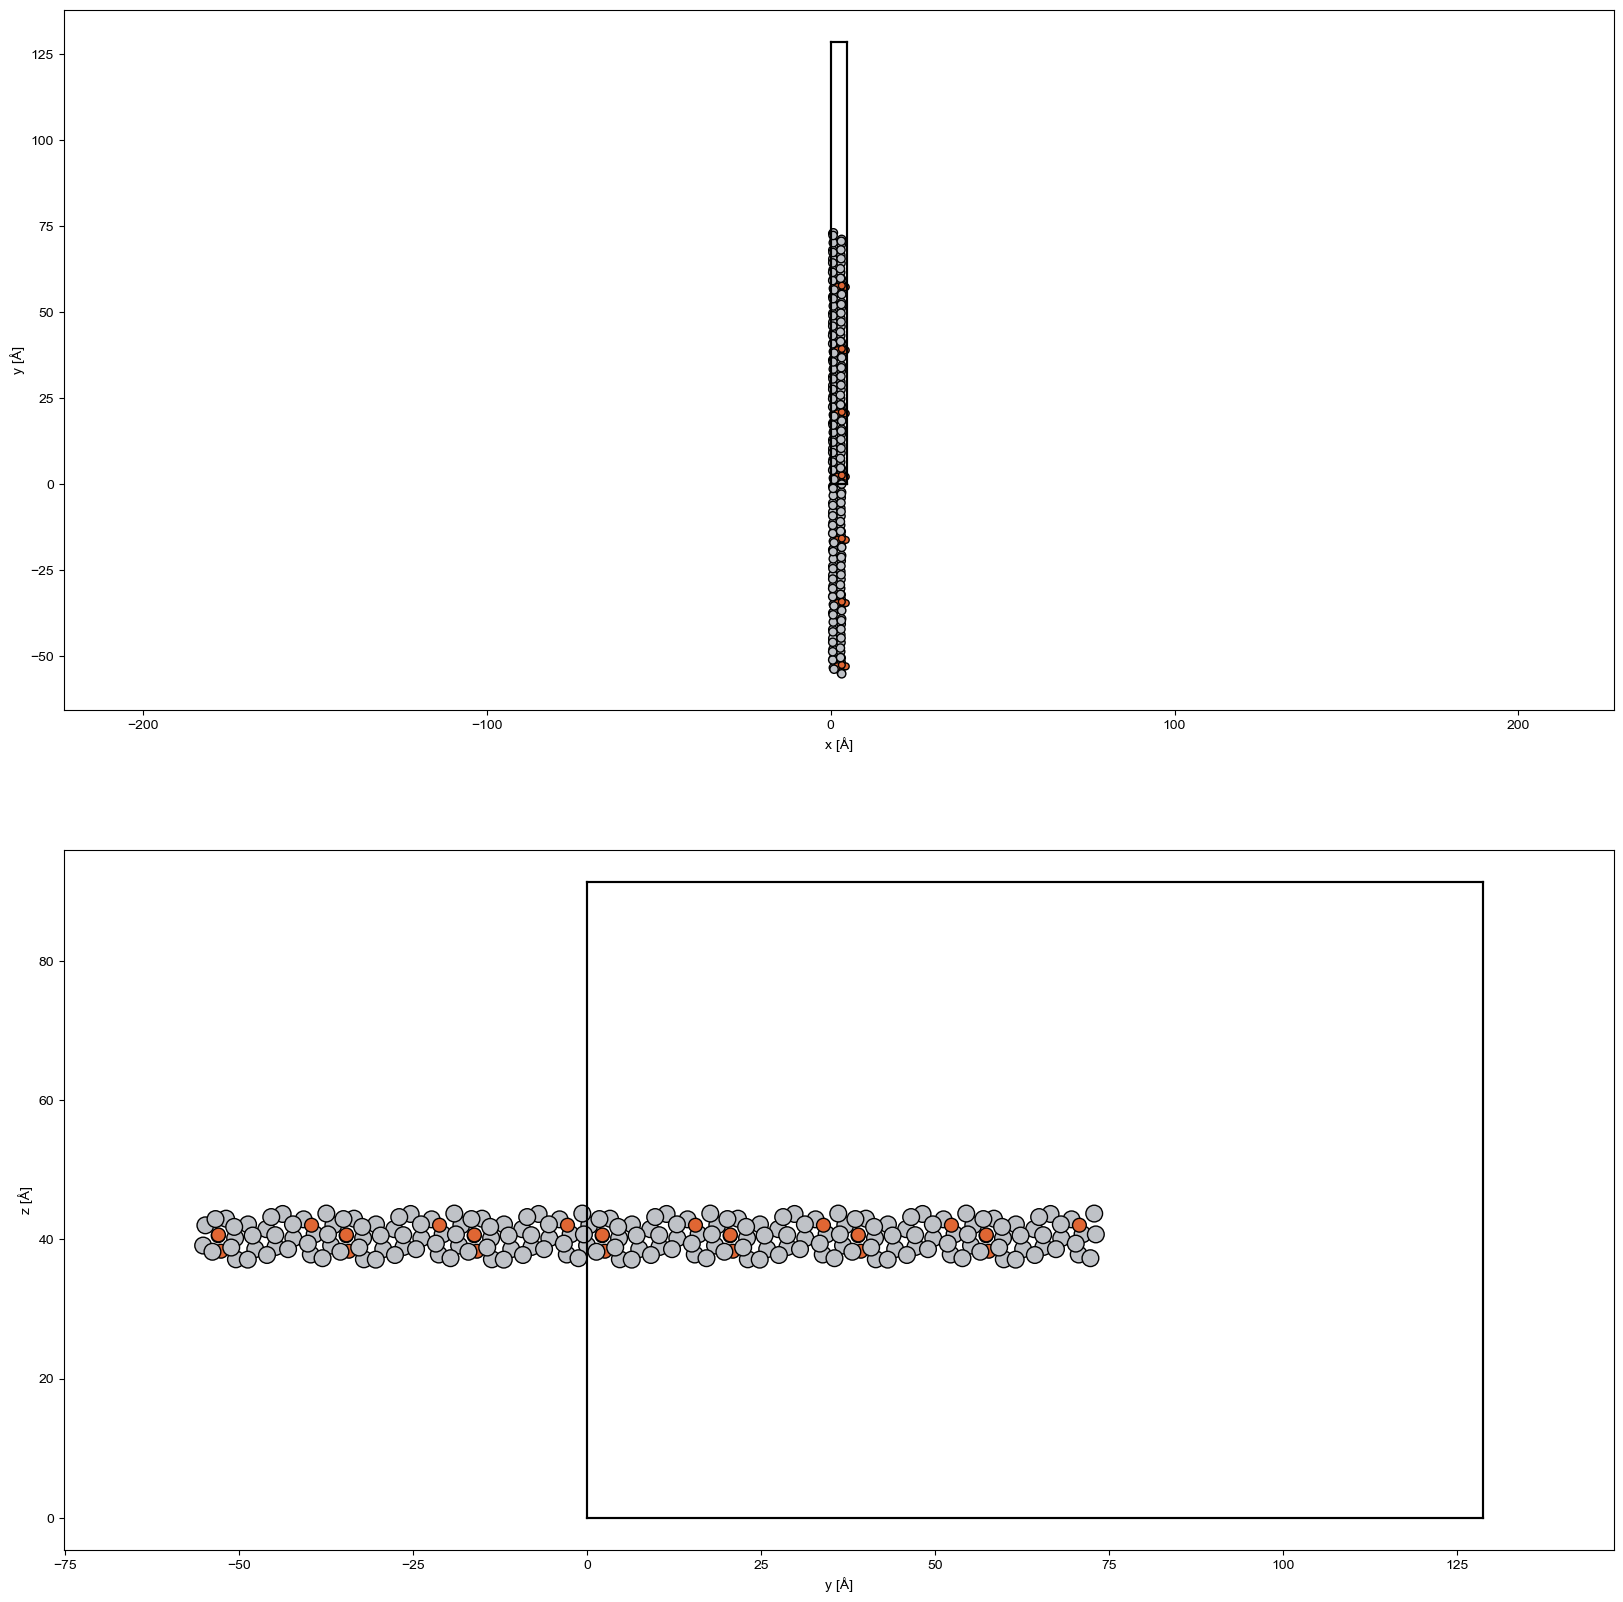

In [18]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 20))
show_atoms(atoms, plane='xy', ax=ax1)
show_atoms(atoms, plane='yz', ax=ax2)

In [19]:
# Determine atom coordinates along z-direction (beam direction)
atoms_pos = atoms.get_positions()

In [20]:
# Swap x and z axis
atoms_pos[:, 0], atoms_pos[:, 1] = atoms_pos[:, 1], atoms_pos[:, 0].copy()
atoms_pos[:, 1], atoms_pos[:, 2] = atoms_pos[:, 2], atoms_pos[:, 1].copy()

In [21]:
# Shift atom positions : every position minus the minimum shifts atoms from negative to the positive side
atoms_pos_new = atoms_pos
atoms_pos_new[:, 0] = atoms_pos_new[:, 0] - np.min(atoms_pos_new[:, 0])
atoms_pos_new[:, 1] = atoms_pos_new[:, 1] - np.min(atoms_pos_new[:, 1])
atoms_pos_new[:, 2] = atoms_pos_new[:, 2] - np.min(atoms_pos_new[:, 2])

# Set new atom positions
atoms.set_positions(atoms_pos_new)

# Set new cell
atoms_pos = atoms.get_positions()
atoms.set_cell([np.max(atoms_pos[:, 0]), np.max(atoms_pos[:, 1]), np.max(atoms_pos[:, 2])])

(<Figure size 2000x2000 with 2 Axes>, <Axes: xlabel='y [Å]', ylabel='z [Å]'>)

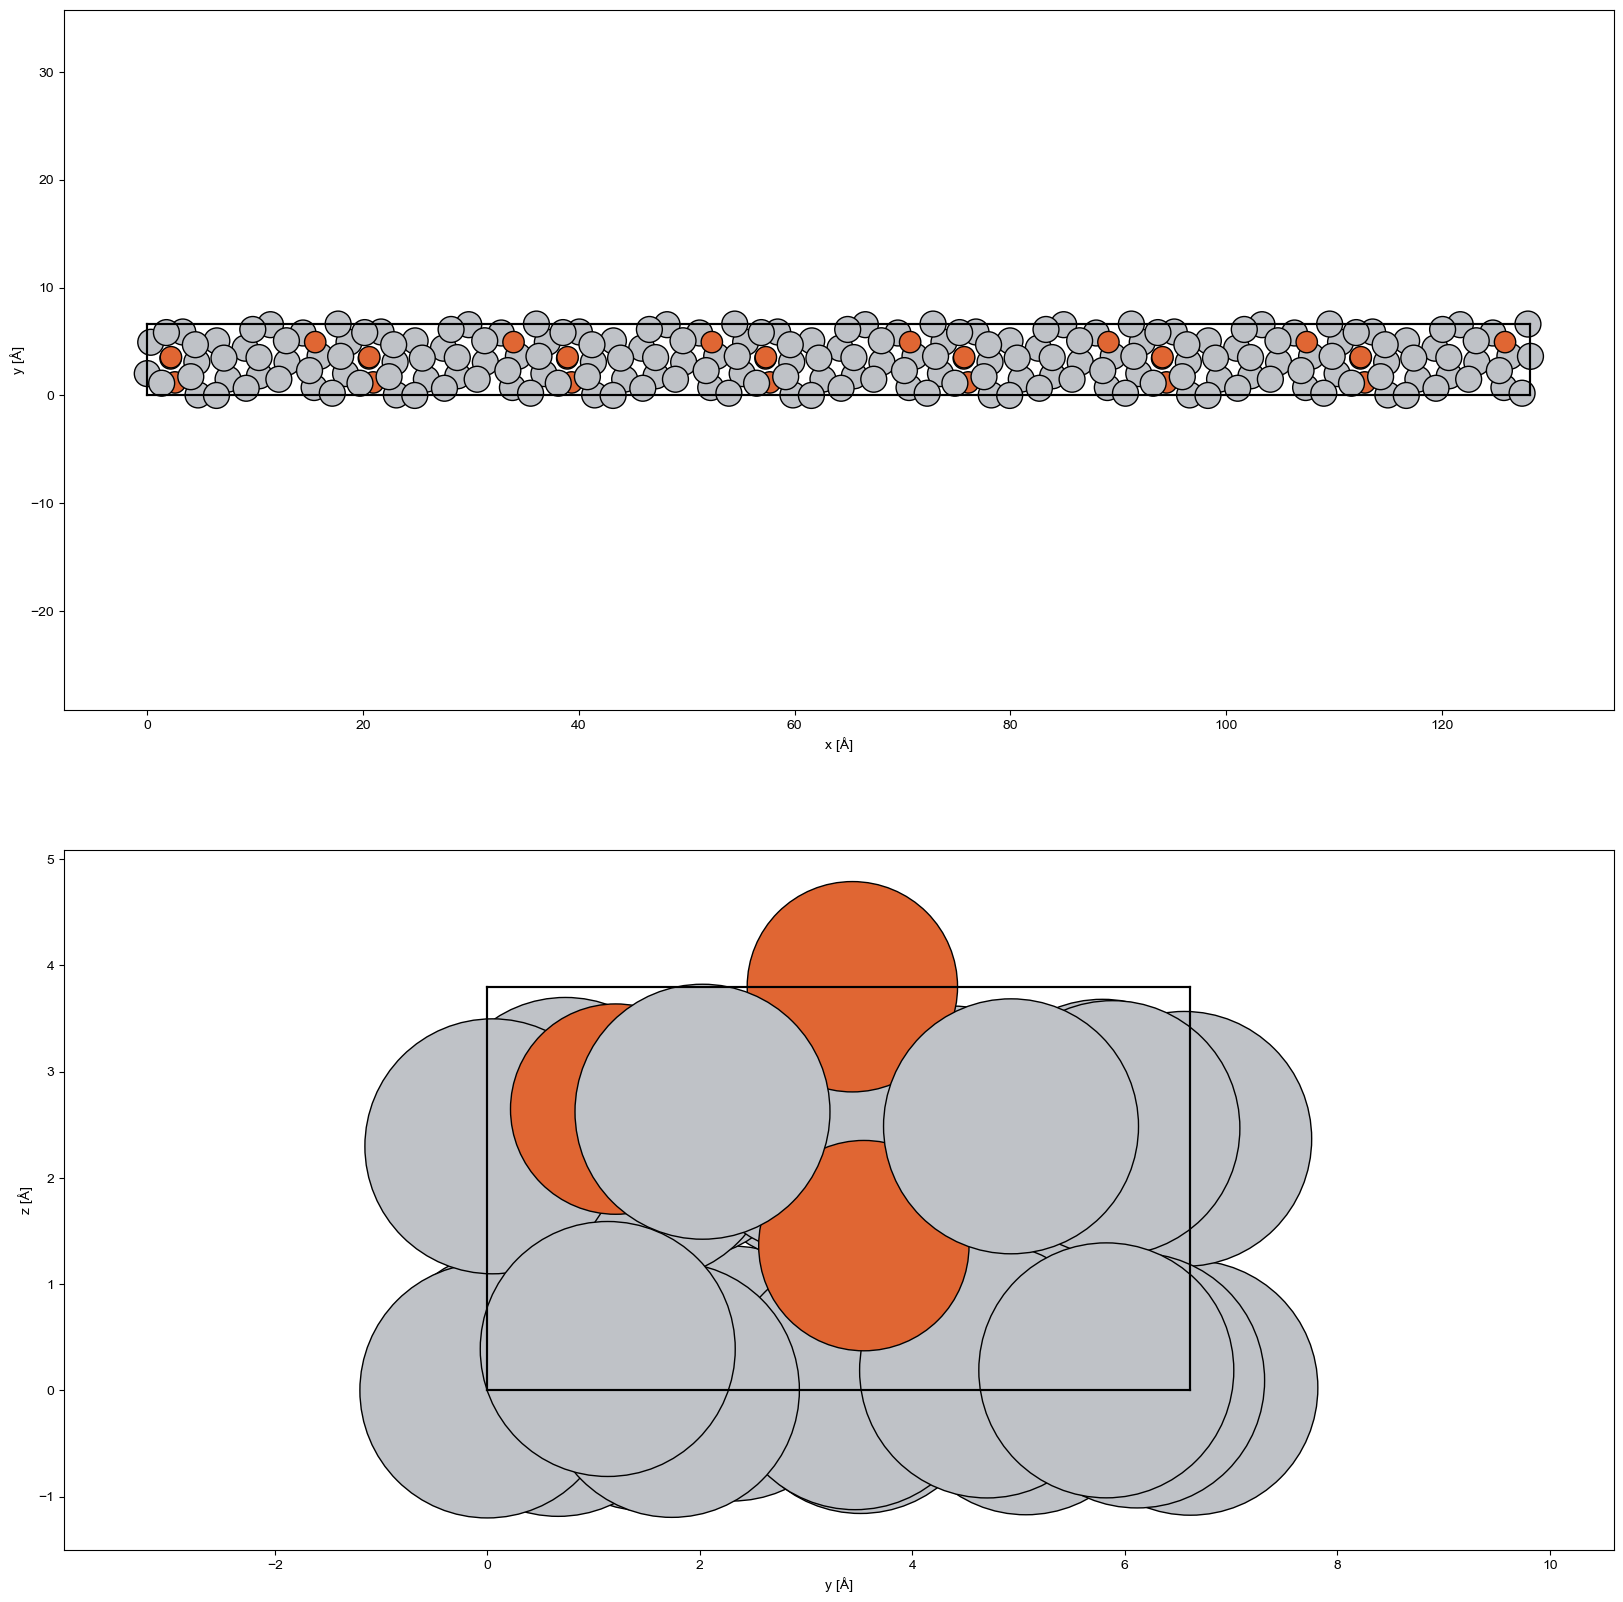

In [22]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 20))
show_atoms(atoms, plane='xy', ax=ax1)
show_atoms(atoms, plane='yz', ax=ax2)

In [23]:
# GB Area crosssection:
x = np.max(atoms_pos[:, 0]) # or atoms.cell[0][0]
y = np.max(atoms_pos[:, 1]) # or atoms.cell[1][1]
z = np.max(atoms_pos[:, 2]) # or atoms.cell[2][2]
GB_Area = x * z * 1e-2  # To convert the area to nm2
GB_Vol = x * y * z * 1e-3 # To convert the area to nm2
GB_Area

4.872524898188536

In [24]:
# Read the number of Fe atoms in the GB
#atoms.numbers is a list of atomic numbers of all the elements present in the 'atoms'
Fe_atoms = np.count_nonzero(atoms.numbers == 26)
Fe_atoms

28

In [25]:
GB_Excess.append(Fe_atoms/GB_Area)

In [26]:
GB_Excess_vol.append(Fe_atoms/GB_Vol)

# GB-03

In [27]:
folder = 'Data/GRIP/'

files = [i for i in os.listdir(folder) if i.startswith("G")]
cells = [os.path.join(folder, i) for i in files]
cells

['Data/GRIP/GB-Cage-04',
 'Data/GRIP/GB-Cage-01',
 'Data/GRIP/GB-Cage-02',
 'Data/GRIP/GB-Cage-03']

In [28]:
from ase.io import read

file_index = 2
atoms = read(cells[file_index])

## Display simulation cell with ASE

(<Figure size 2000x2000 with 2 Axes>, <Axes: xlabel='y [Å]', ylabel='z [Å]'>)

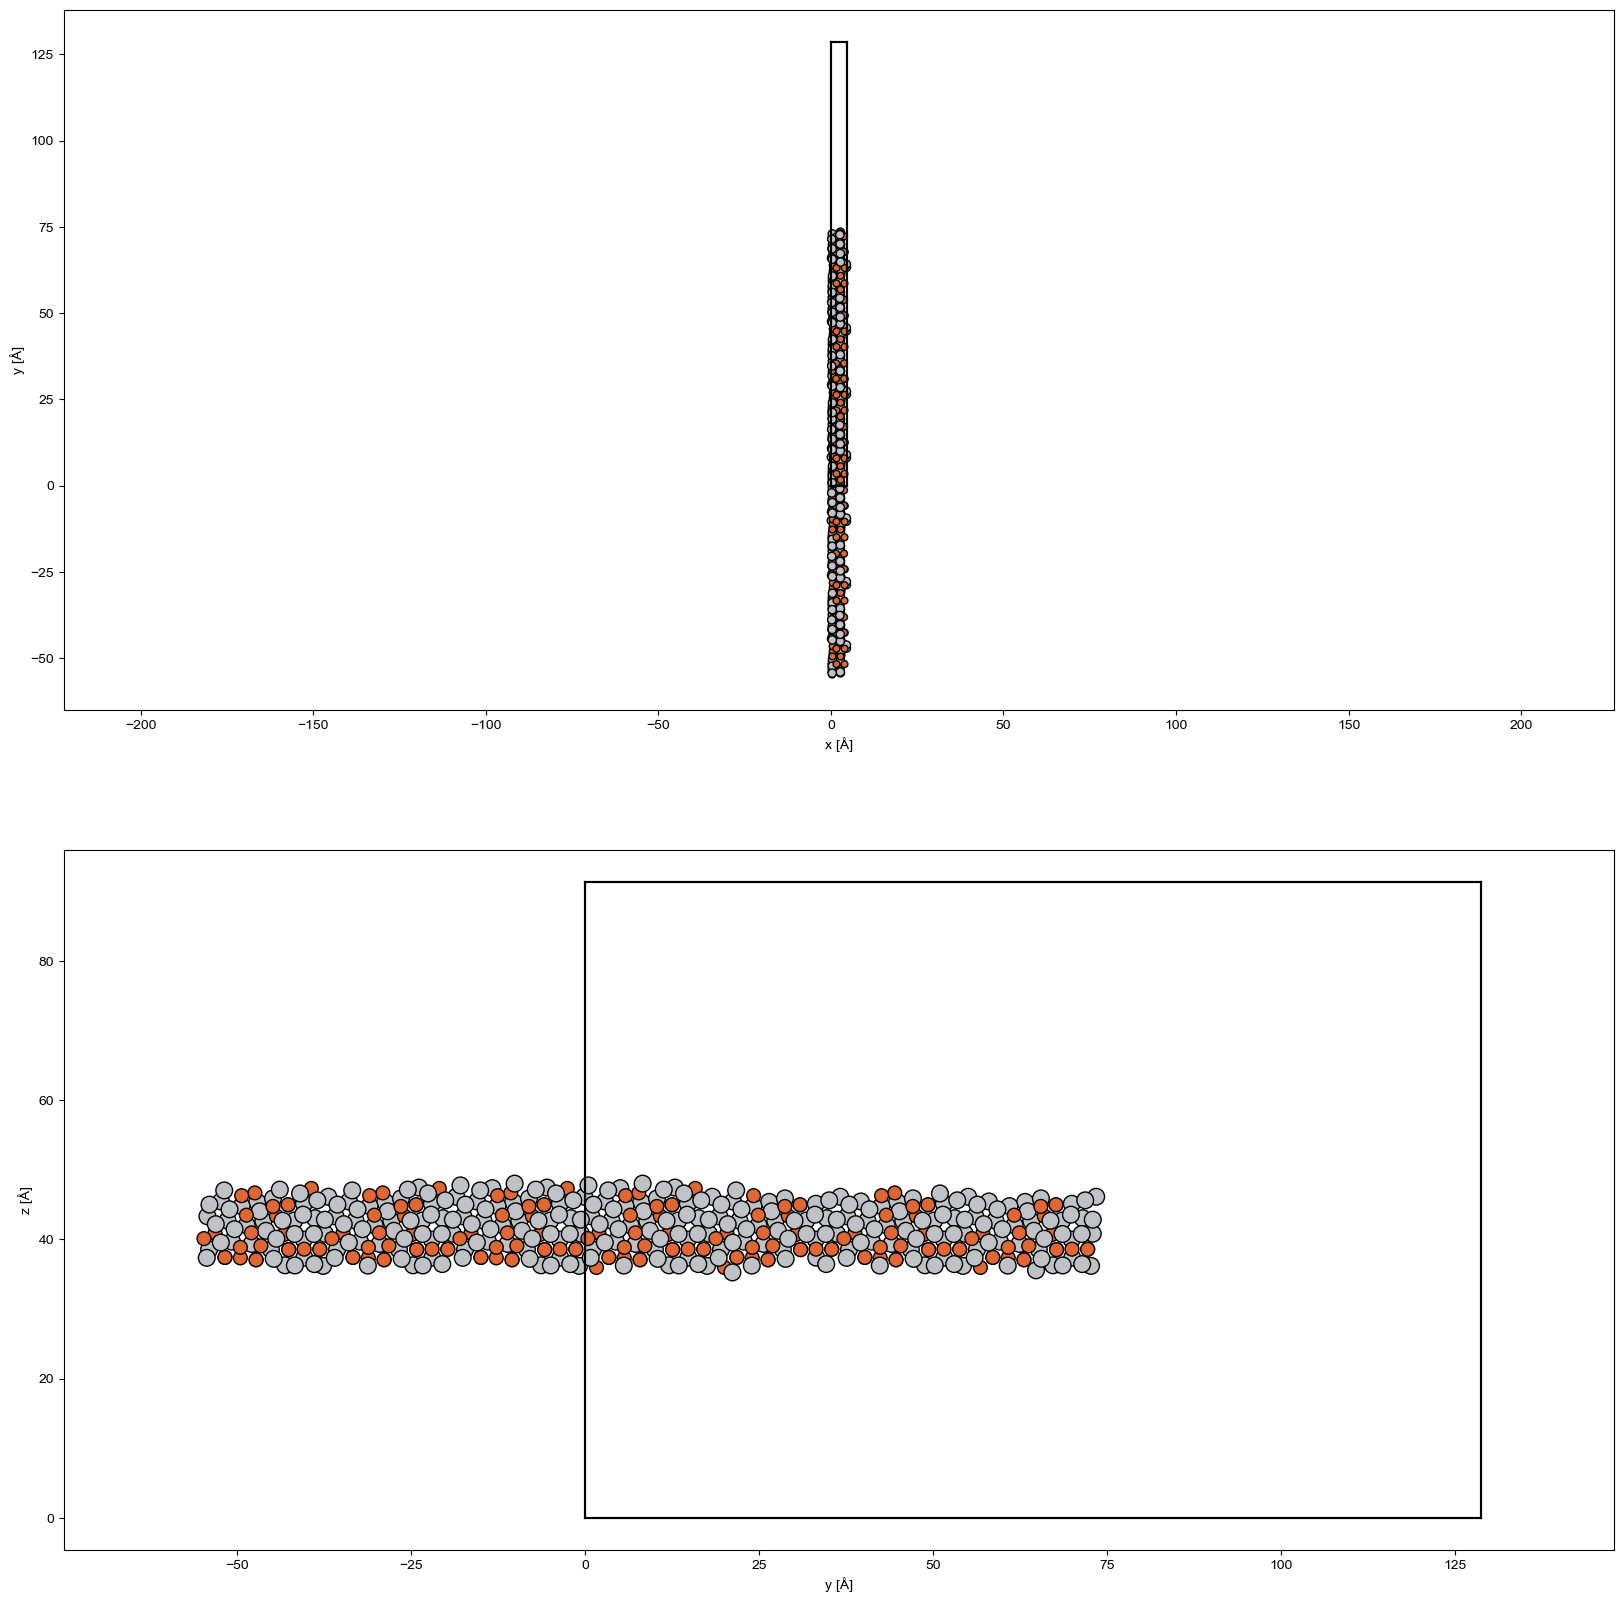

In [29]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 20))
show_atoms(atoms, plane='xy', ax=ax1)
show_atoms(atoms, plane='yz', ax=ax2)

In [30]:
# Determine atom coordinates along z-direction (beam direction)
atoms_pos = atoms.get_positions()

In [31]:
# Swap x and z axis
atoms_pos[:, 0], atoms_pos[:, 1] = atoms_pos[:, 1], atoms_pos[:, 0].copy()
atoms_pos[:, 1], atoms_pos[:, 2] = atoms_pos[:, 2], atoms_pos[:, 1].copy()

In [32]:
# Shift atom positions : every position minus the minimum shifts atoms from negative to the positive side
atoms_pos_new = atoms_pos
atoms_pos_new[:, 0] = atoms_pos_new[:, 0] - np.min(atoms_pos_new[:, 0])
atoms_pos_new[:, 1] = atoms_pos_new[:, 1] - np.min(atoms_pos_new[:, 1])
atoms_pos_new[:, 2] = atoms_pos_new[:, 2] - np.min(atoms_pos_new[:, 2])

# Set new atom positions
atoms.set_positions(atoms_pos_new)

# Set new cell
atoms_pos = atoms.get_positions()
atoms.set_cell([np.max(atoms_pos[:, 0]), np.max(atoms_pos[:, 1]), np.max(atoms_pos[:, 2])])

(<Figure size 2000x2000 with 2 Axes>, <Axes: xlabel='y [Å]', ylabel='z [Å]'>)

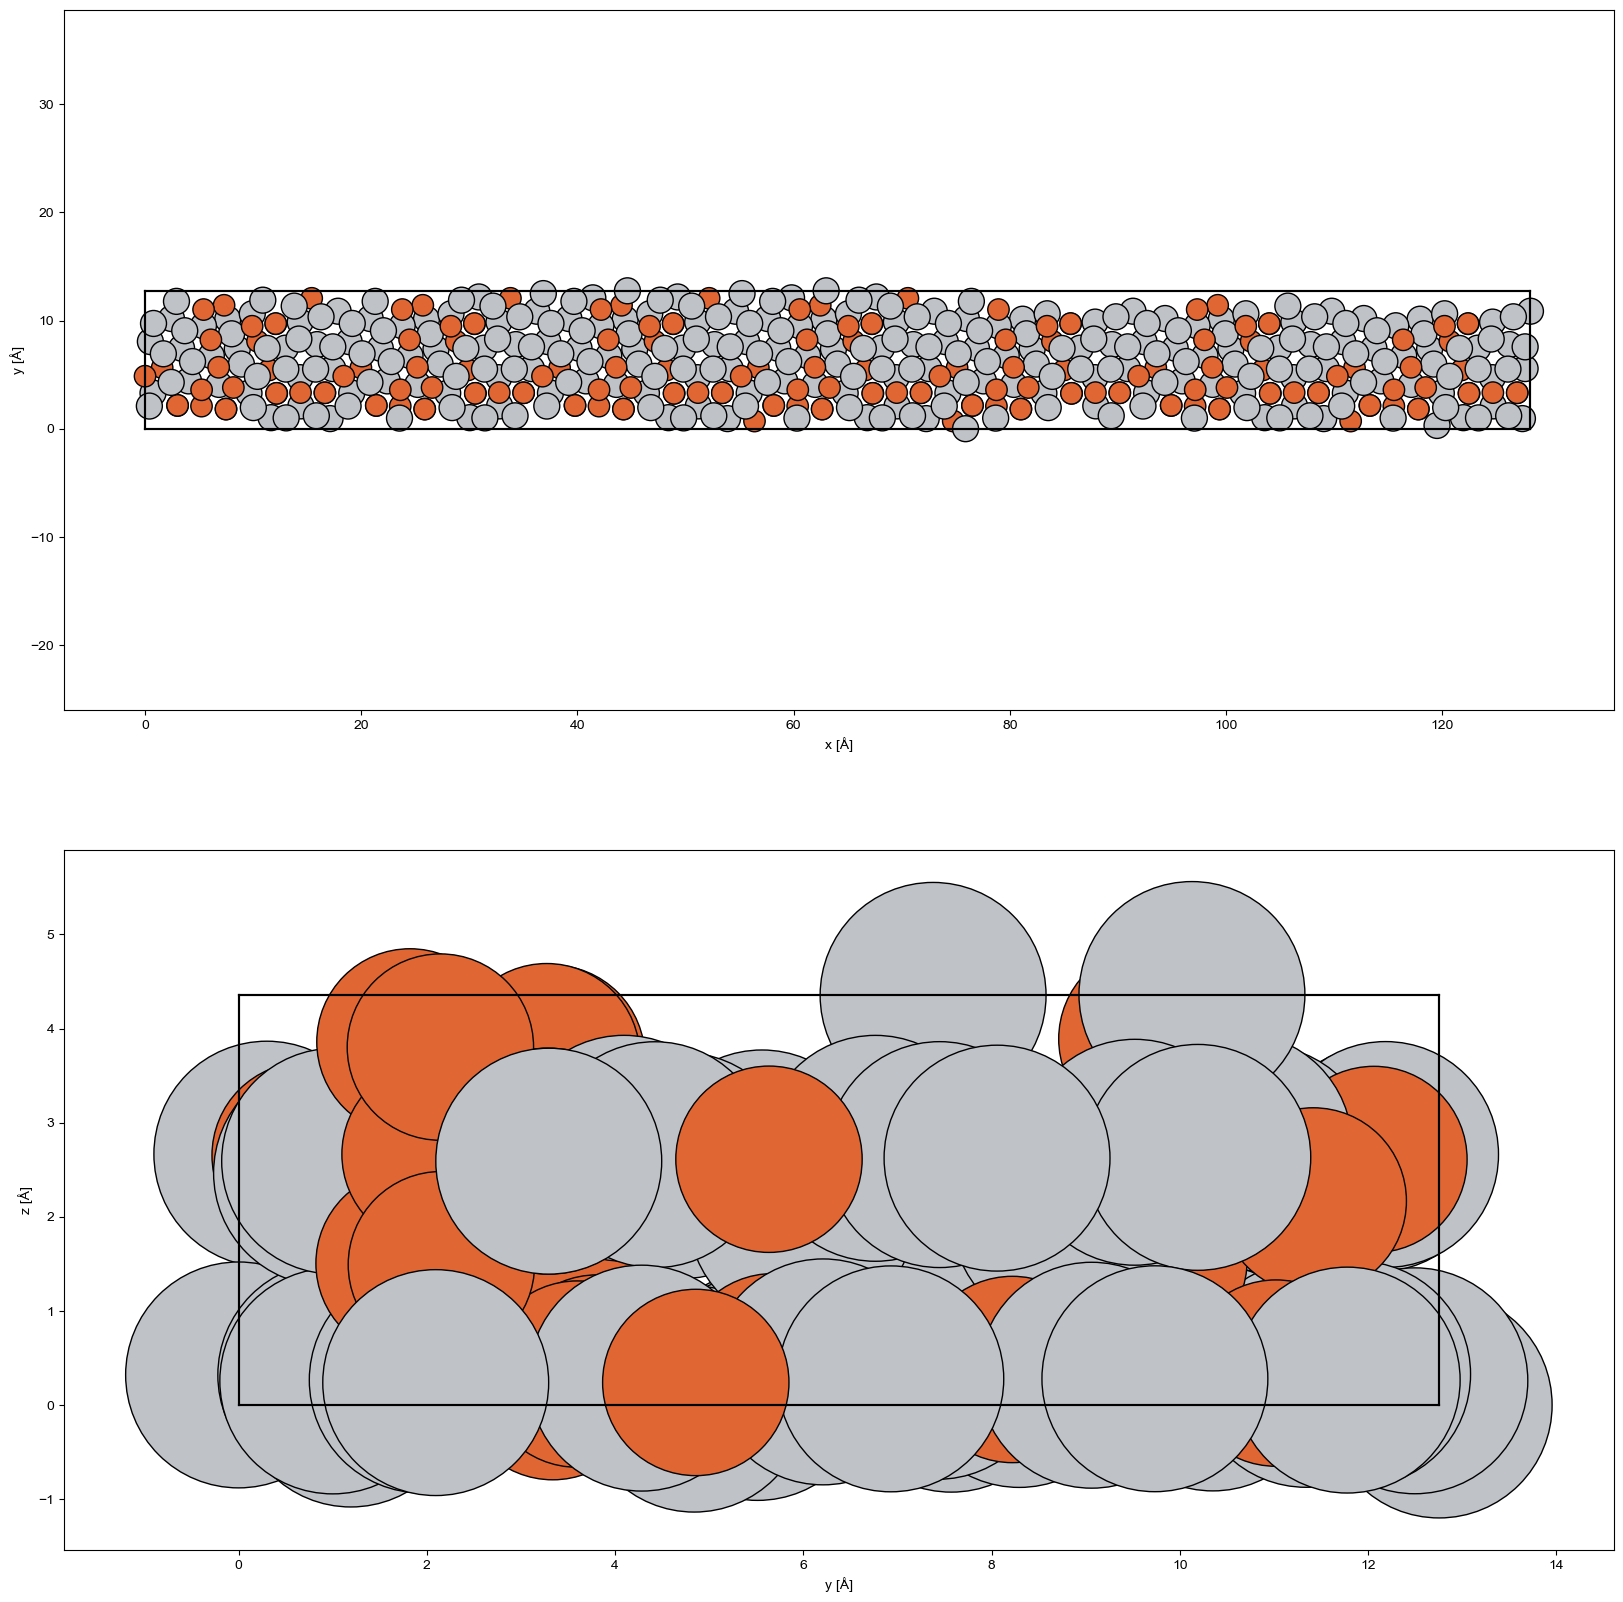

In [33]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 20))
show_atoms(atoms, plane='xy', ax=ax1)
show_atoms(atoms, plane='yz', ax=ax2)

In [34]:
# GB Area crosssection:
x = np.max(atoms_pos[:, 0]) # or atoms.cell[0][0]
y = np.max(atoms_pos[:, 1]) # or atoms.cell[1][1]
z = np.max(atoms_pos[:, 2]) # or atoms.cell[2][2]
GB_Area = x * z * 1e-2  # To convert the area to nm2
GB_Vol = x * y * z * 1e-3 # To convert the area to nm2
GB_Area

5.588972083186016

In [35]:
# Read the number of Fe atoms in the GB
#atoms.numbers is a list of atomic numbers of all the elements present in the 'atoms'
Fe_atoms = np.count_nonzero(atoms.numbers == 26)
Fe_atoms

165

In [36]:
GB_Excess.append(Fe_atoms/GB_Area)

In [37]:
GB_Excess_vol.append(Fe_atoms/GB_Vol)

# GB 04

In [38]:
folder = 'Data/GRIP/'

files = [i for i in os.listdir(folder) if i.startswith("G")]
cells = [os.path.join(folder, i) for i in files]
cells

['Data/GRIP/GB-Cage-04',
 'Data/GRIP/GB-Cage-01',
 'Data/GRIP/GB-Cage-02',
 'Data/GRIP/GB-Cage-03']

In [39]:
from ase.io import read

file_index = 3
atoms = read(cells[file_index])

## Display simulation cell with ASE

(<Figure size 2000x2000 with 2 Axes>, <Axes: xlabel='y [Å]', ylabel='z [Å]'>)

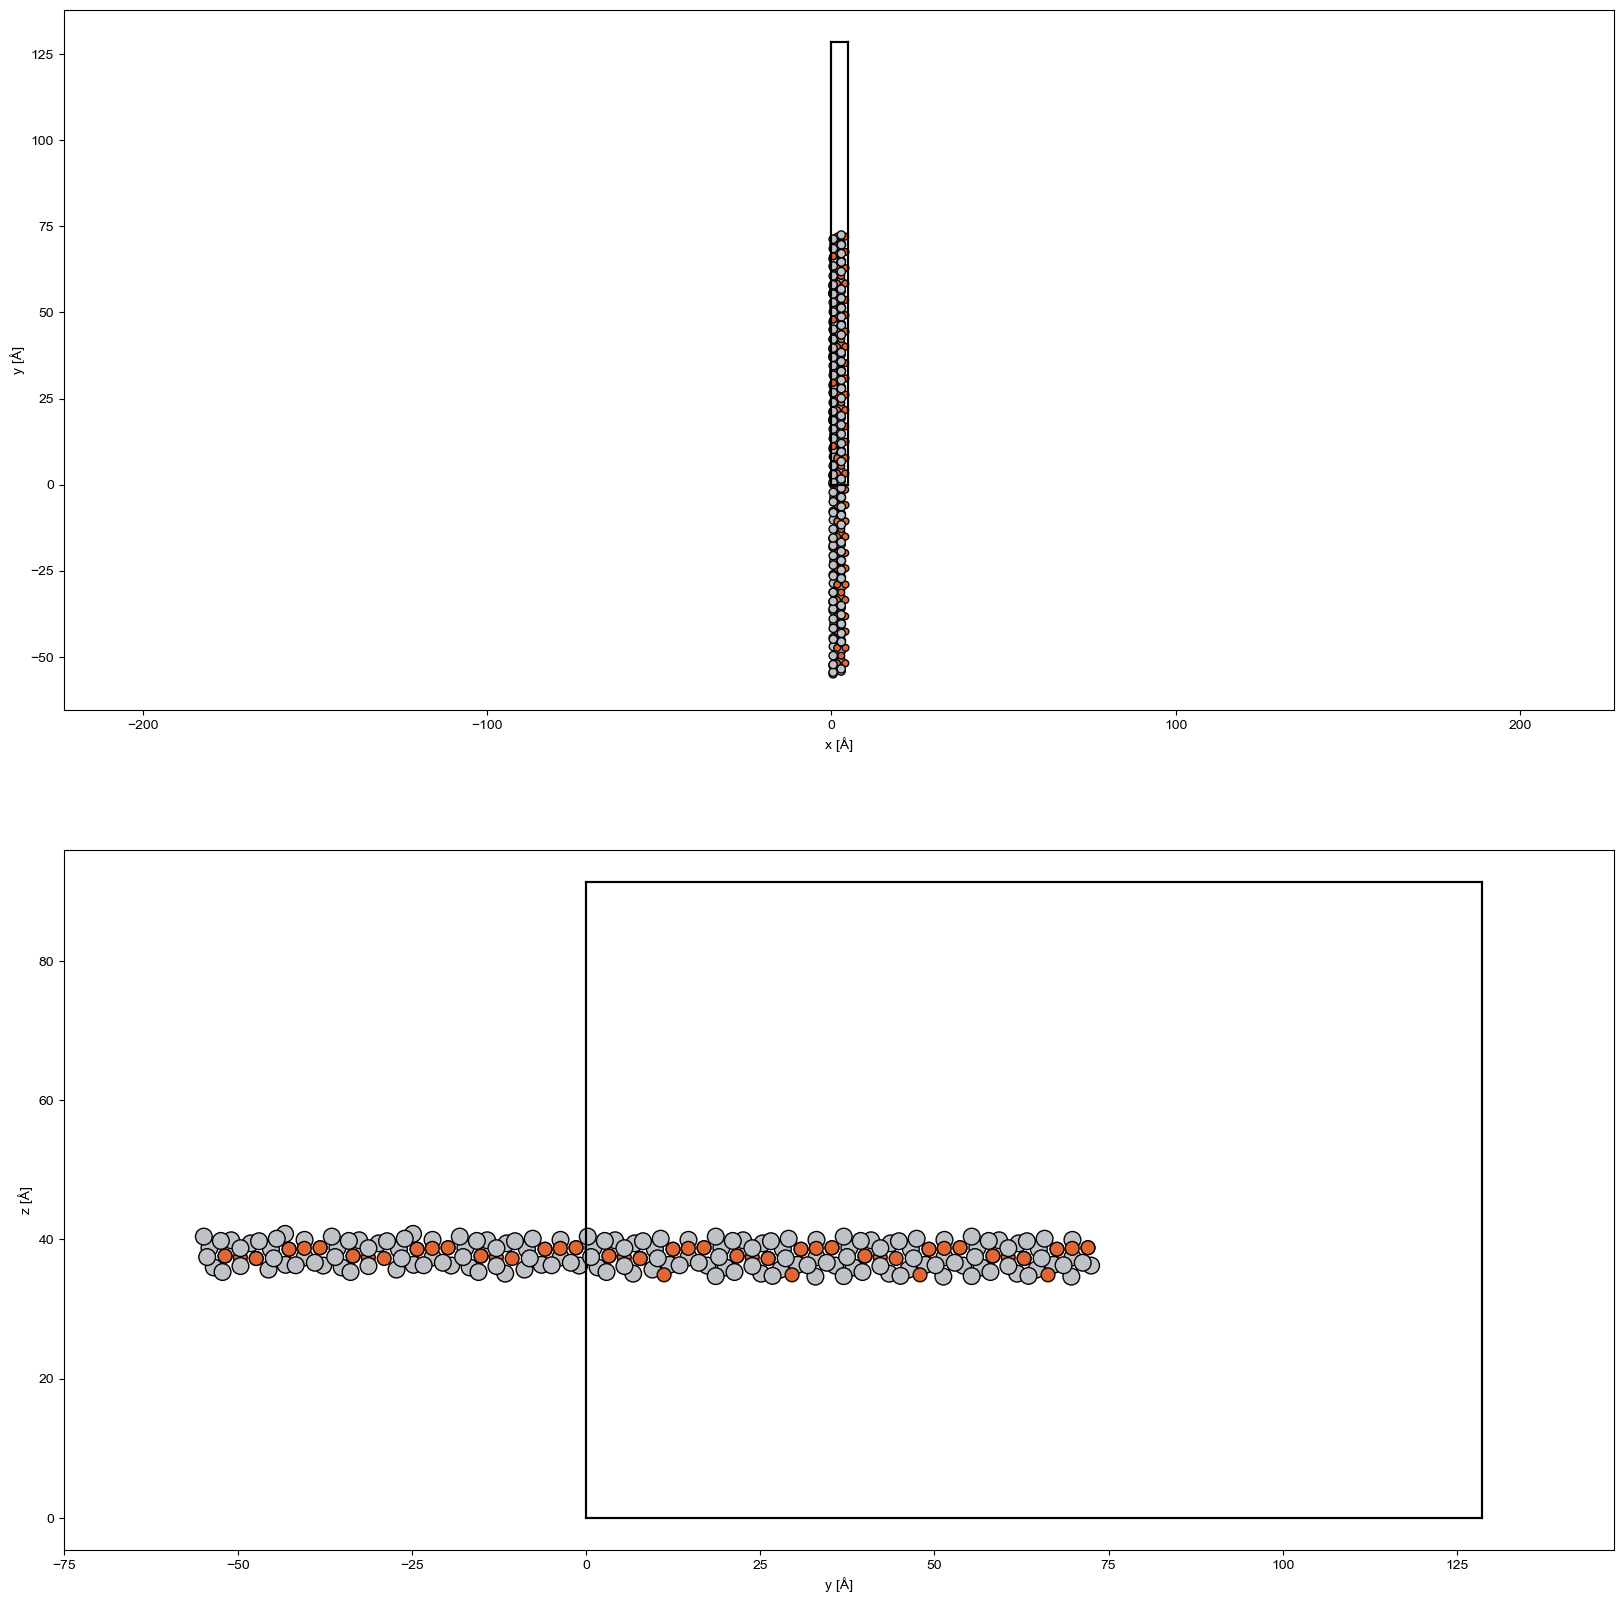

In [40]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 20))
show_atoms(atoms, plane='xy', ax=ax1)
show_atoms(atoms, plane='yz', ax=ax2)

In [41]:
# Determine atom coordinates along z-direction (beam direction)
atoms_pos = atoms.get_positions()

In [42]:
# Swap x and z axis
atoms_pos[:, 0], atoms_pos[:, 1] = atoms_pos[:, 1], atoms_pos[:, 0].copy()
atoms_pos[:, 1], atoms_pos[:, 2] = atoms_pos[:, 2], atoms_pos[:, 1].copy()

In [43]:
# Shift atom positions : every position minus the minimum shifts atoms from negative to the positive side
atoms_pos_new = atoms_pos
atoms_pos_new[:, 0] = atoms_pos_new[:, 0] - np.min(atoms_pos_new[:, 0])
atoms_pos_new[:, 1] = atoms_pos_new[:, 1] - np.min(atoms_pos_new[:, 1])
atoms_pos_new[:, 2] = atoms_pos_new[:, 2] - np.min(atoms_pos_new[:, 2])

# Set new atom positions
atoms.set_positions(atoms_pos_new)

# Set new cell
atoms_pos = atoms.get_positions()
atoms.set_cell([np.max(atoms_pos[:, 0]), np.max(atoms_pos[:, 1]), np.max(atoms_pos[:, 2])])

(<Figure size 2000x2000 with 2 Axes>, <Axes: xlabel='y [Å]', ylabel='z [Å]'>)

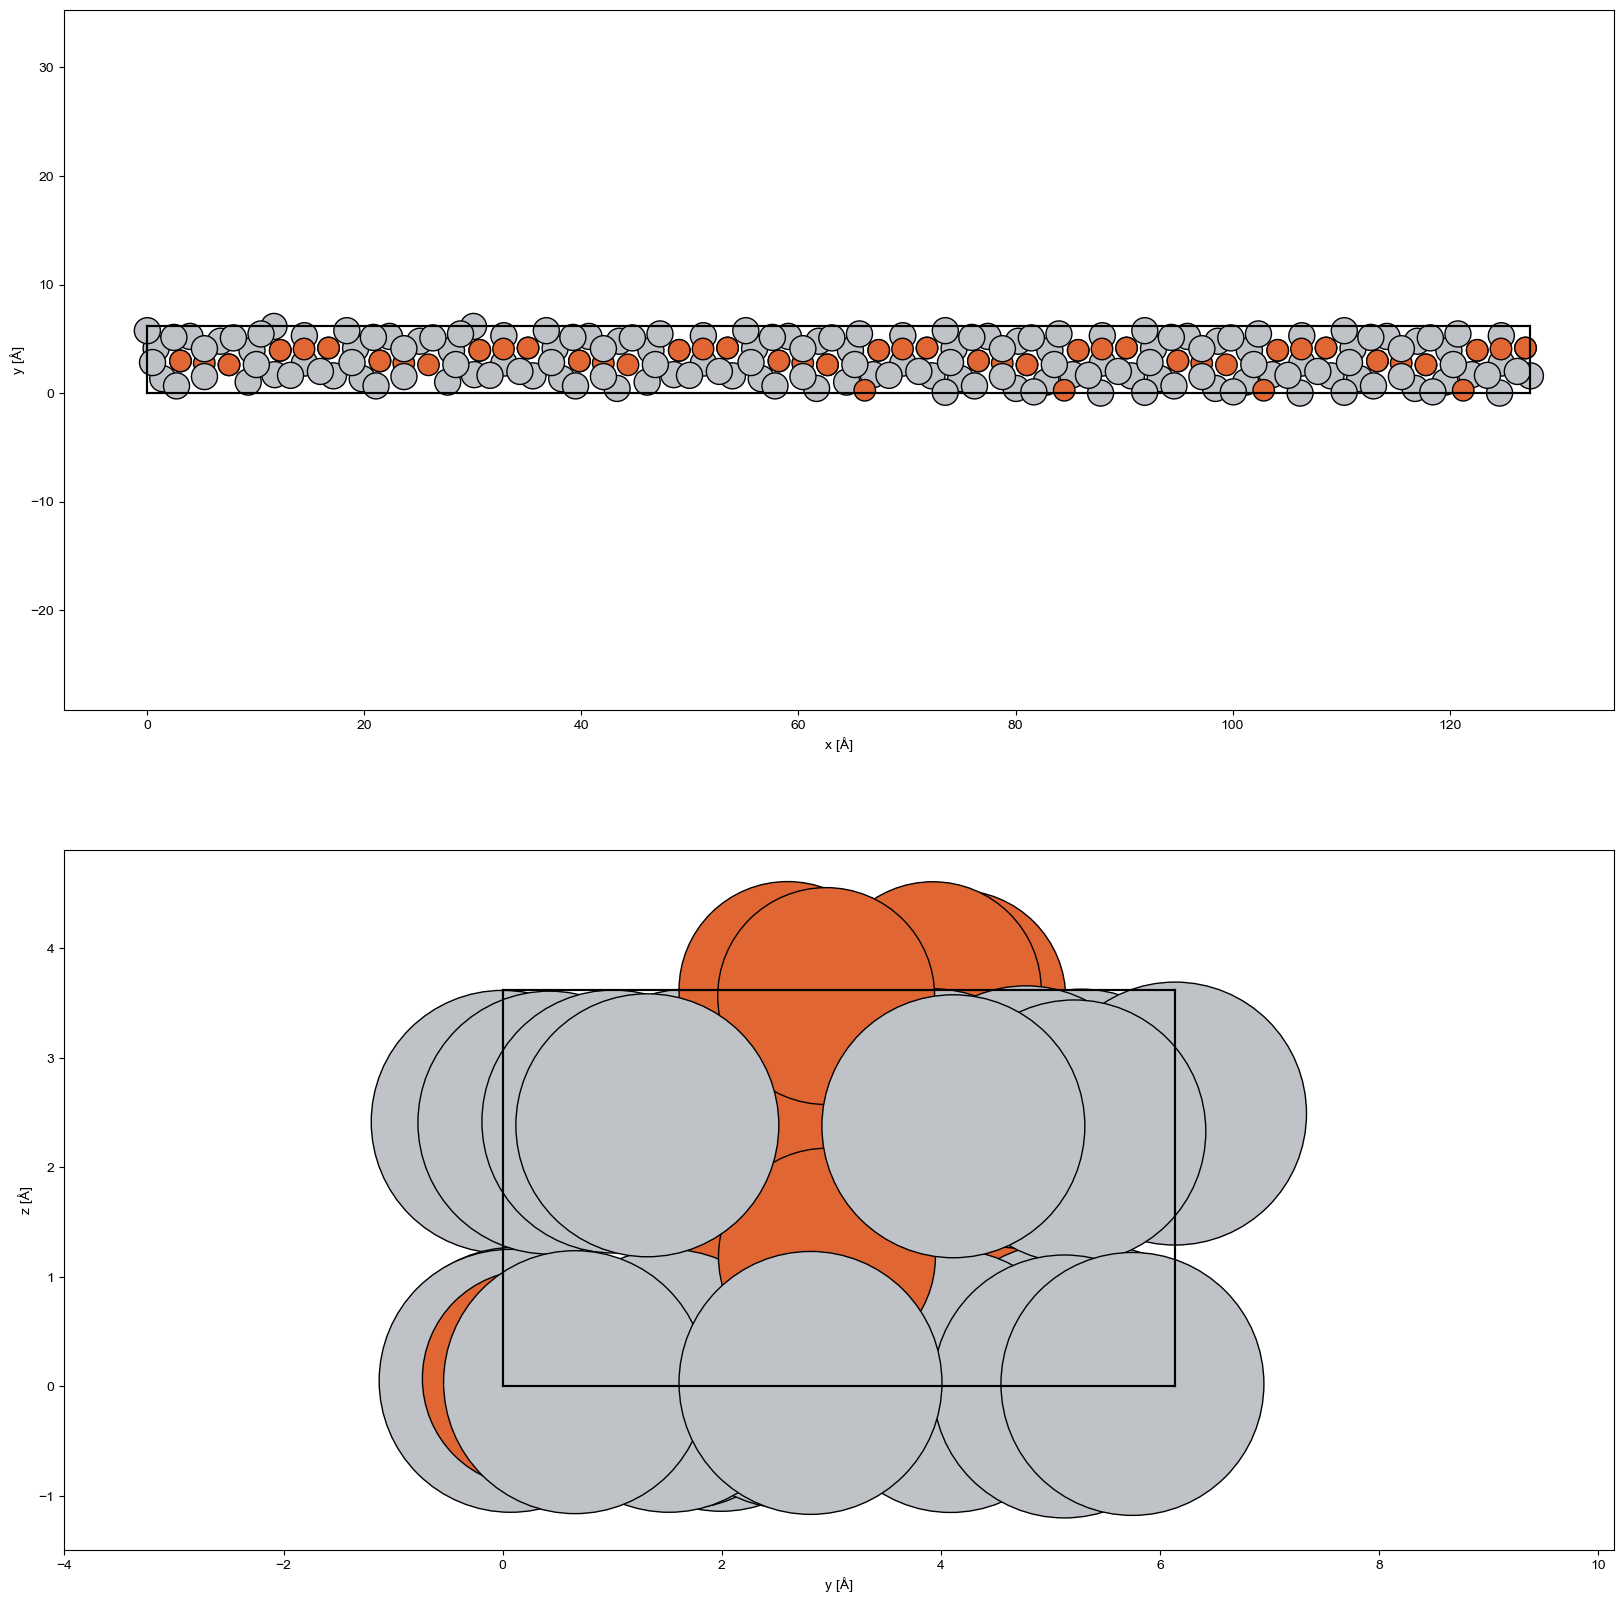

In [44]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 20))
show_atoms(atoms, plane='xy', ax=ax1)
show_atoms(atoms, plane='yz', ax=ax2)

In [45]:
# GB Area crosssection:
x = np.max(atoms_pos[:, 0]) # or atoms.cell[0][0]
y = np.max(atoms_pos[:, 1]) # or atoms.cell[1][1]
z = np.max(atoms_pos[:, 2]) # or atoms.cell[2][2]
GB_Area = x * z * 1e-2  # To convert the area to nm2
GB_Vol = x * y * z * 1e-3 # To convert the area to nm2
GB_Area

4.611746053287504

In [46]:
# Read the number of Fe atoms in the GB
#atoms.numbers is a list of atomic numbers of all the elements present in the 'atoms'
Fe_atoms = np.count_nonzero(atoms.numbers == 26)
Fe_atoms

74

In [47]:
GB_Excess.append(Fe_atoms/GB_Area)

In [48]:
GB_Excess_vol.append(Fe_atoms/GB_Vol)

In [49]:
# We sort the values because we opened the files in random order.
GB_Excess.sort()

In [50]:
GB_Excess_vol.sort()

# Plot GB excess

In [51]:
GB_Excess

[5.74650732116517, 8.416633006349473, 16.045983266413543, 29.52242336231908]

## Figure- Publication - vertical

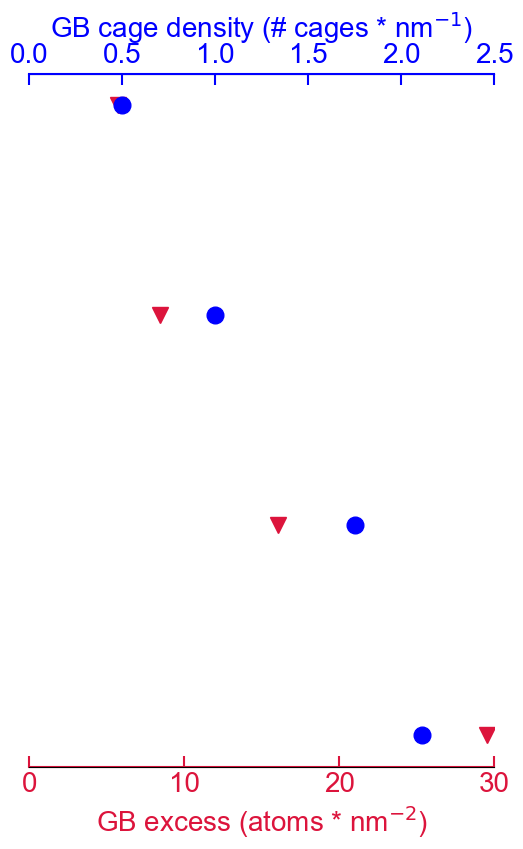

In [52]:
fig_GB_excess, ax = plt.subplots(figsize=(6, 9))

y = [1, 2, 3, 4]
x_err_values = [0, 0, 0, 0]

for i in range(len(GB_Excess)):
    ax.errorbar(x=GB_Excess[i], y=y[i], xerr=x_err_values[i], linestyle='None', marker='v', color='crimson', ms=12)

ax.set_xlabel('GB excess (atoms * nm$^{-2}$)', color='crimson', size=20)

ax.spines[['top', 'bottom']].set_visible(True)
ax.spines[['left', 'right']].set_visible(False)
ax.set_xlim(0, 30)

ax.xaxis.tick_bottom()
ax.xaxis.set_label_position('bottom')
ax.invert_yaxis()
ax.yaxis.tick_right()
ax.set_yticks([])
ax.tick_params(axis='x', labelsize=20)

GB_Cage_Den = [0.5, 1.0, 1.75, 2.11]
ax2 = ax.twiny()

x_err_values = [0, 0, 0, 0]
for i in range(len(GB_Cage_Den)):
    ax2.errorbar(x=GB_Cage_Den[i], y=y[i], xerr=x_err_values[i], linestyle='None', marker='o', color='Blue', ms=12)
    
ax2.set_xlim(0, 2.5)

ax2.spines[['left', 'right']].set_visible(False)
ax2.xaxis.tick_top()
ax2.xaxis.set_label_position('top')
ax2.set_xlabel(r'GB cage density (# cages * nm$^{-1}$)', color='Blue', size=20)
ax2.tick_params(axis='x', labelsize=20)

# Set x-axis line width to 1.5
ax.spines['bottom'].set_linewidth(1.5)
ax2.spines['top'].set_linewidth(1.5)

# Make ticks inward
ax.tick_params(axis='x', direction='in', width=1.5, length=8, color='crimson')
ax2.tick_params(axis='x', direction='in', width=1.5, length=8, color='blue')

# Set bottom axis color to crimson
ax.spines['bottom'].set_color('crimson')
ax.spines['bottom'].set_color('crimson')


# Set top axis color to blue
ax2.spines['top'].set_color('blue')

# Set x-tick labels color
ax.tick_params(axis='x', labelcolor='crimson')
ax2.tick_params(axis='x', labelcolor='blue')

In [53]:
fig_GB_excess.savefig(folder + 'GRIP_Solute_excess_plot_vertical.png', dpi=300, bbox_inches='tight')

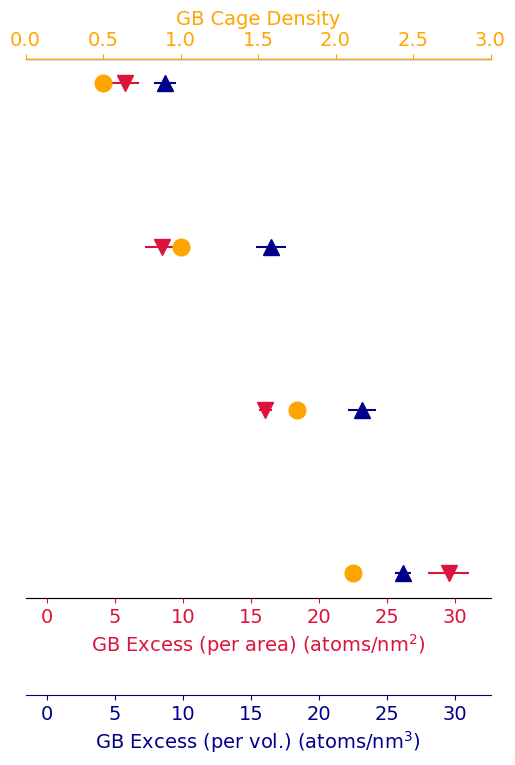

In [50]:
# Not shown in publication
fig_GB_excess, ax = plt.subplots(figsize=(6, 7))

y = [1, 2, 3, 4]
x_err_values = [1., 1.2, 0.5, 1.5]

for i in range(len(GB_Excess)):
    ax.errorbar(x=GB_Excess[i], y=y[i], xerr=x_err_values[i], linestyle='None', marker='v', color='crimson', ms=12)

ax.set_xlabel('GB Excess (per area) (atoms/nm$^{2}$)', color='crimson', size=14)

ax.spines[['top', 'bottom']].set_visible(True)
ax.spines[['left', 'right']].set_visible(False)
ax.set_xlim(-1, 32)

ax.xaxis.tick_bottom()
ax.xaxis.set_label_position('bottom')
ax.invert_yaxis()
ax.yaxis.tick_right()
ax.set_yticks([])
ax.tick_params(axis='x', labelsize=14)

ax.spines['bottom'].set_color('crimson')
ax.tick_params(axis='x', colors='crimson')


ax2 = ax.twiny()
# set the position of the second x-axis
ax2.spines['bottom'].set_position(('axes', -0.18))
ax2.set_xlim(ax.get_xlim())

x_err_values = [0.8, 1.1, 1.0, 0.6]

for i in range(len(GB_Excess_vol)):
    ax2.errorbar(x=GB_Excess_vol[i], y=y[i], xerr=x_err_values[i], linestyle='None', marker='^', color='darkblue', ms=12)

ax2.spines['bottom'].set_color('darkblue')
ax2.spines[['left', 'right']].set_visible(False)

ax2.tick_params(axis='x', colors='darkblue')

ax2.xaxis.tick_bottom()
ax2.xaxis.set_label_position('bottom')
ax2.yaxis.tick_right()
ax2.set_xlabel('GB Excess (per vol.) (atoms/nm$^{3}$)', color = 'darkblue', size=14)
ax2.tick_params(axis='x', labelsize=14)


GB_Cage_Den = [0.5, 1.0, 1.75, 2.11]
ax3 = ax.twiny()

x_err_values = [0, 0, 0, 0]
for i in range(len(GB_Cage_Den)):
    ax3.errorbar(x=GB_Cage_Den[i], y=y[i], xerr=x_err_values[i], linestyle='None', marker='o', color='Orange', ms=12)
    
ax3.set_xlim(0, 3)

ax3.spines['top'].set_color('Orange')
ax3.spines[['left', 'right']].set_visible(False)
ax3.tick_params(axis='x', colors='Orange')

ax3.xaxis.tick_top()
ax3.xaxis.set_label_position('top')
#ax2.invert_yaxis()
#ax3.yaxis.tick_right()
ax3.set_xlabel('GB Cage Density', color = 'Orange', size=14)
ax3.tick_params(axis='x', labelsize=14)

ax.set_aspect(12.0)
ax2.set_aspect(12.0)

#ax.set_aspect('equal')
#ax2.set_aspect(7.5)